## Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocessing

In [106]:
train_path = "./drive/My Drive/data/Train.csv"
test_path = "./drive/My Drive/data/Test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col37,Col38,Col39,Col40,...,Col2358,Col2359,Col2360,Col2361,Col2362,Col2363,Col2364,Col2365,Col2366,Col2367,Col2368,Col2369,Col2370,Col2371,Col2372,Col2373,Col2374,Col2375,Col2376,Col2377,Col2378,Col2379,Col2380,Col2381,Col2382,Col2383,Col2384,Col2385,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,9.114586e+03,3.043078e+04,9.293496,8.570479,10.063117,10.271758,0.548538,0.403366,NaN,NaN,1.486524,1.728324,0.993441,1.297050,0.137398,0.115987,0.260428,1.414214,1,1,1,1,1,1,0,6,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,2.013518e+05,1.859404e+05,12.462385,12.280493,12.167132,12.136876,1.167898,2.676398,NaN,NaN,0.792123,0.934556,0.893203,0.966620,0.753892,0.808295,1.414214,NaN,1,1,3,4,4,0,4,5,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,9.368338e+06,1.113330e+07,16.496090,16.749305,16.532874,16.128357,1.145182,2.203874,NaN,NaN,0.422264,0.498347,0.683582,0.735339,0.808115,0.776910,1.414214,NaN,3,3,4,12,4,0,2,4,NaN,1.0,NaN,NaN,...,1,0,1,0,1,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,4.304848e+05,4.065539e+05,13.419061,13.624018,13.541837,13.429097,1.204010,0.536304,NaN,NaN,0.437243,0.521341,0.623499,0.534531,-0.125829,0.388830,-1.414214,NaN,2,2,2,24,1,0,1,4,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1,2,0,1,2,0,0,0,0,0,1,2,0,0,0,0,0,1,2,0,0,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,3.473444e+06,3.262168e+06,NaN,14.764533,14.551021,NaN,NaN,NaN,NaN,NaN,NaN,1.344637,NaN,1.563430,-0.113101,0.617486,1.414214,NaN,4,3,4,68,8,0,2,4,NaN,3.0,NaN,NaN,...,0,0,0,0,0,0,2,1,0,0,0,0,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


1st column is ID and Second columns is Target variable

In [0]:
train_last_index = 17520

## TODO:Combine test train and process

In [71]:
X = train_df.iloc[:,2:]

X.shape

(17521, 2393)

In [0]:
# Columns Null check
def null_cols(d,columns):
  na = d[columns].isna().sum().sort_values(ascending=False)
  return na[na > 0].index.to_list()

In [73]:
# Numerical columns
num_cols = X.select_dtypes(include="number").columns
print('Total',len(num_cols))

na_cols = null_cols(X,num_cols)
print('1.Null columns',len(na_cols))

if len(na_cols) > 0:
  X[na_cols]= X[na_cols].fillna(method='ffill')
  X[na_cols]= X[na_cols].fillna(method='bfill')
  na_cols = null_cols(X,num_cols)
  print('2.Null columns',len(na_cols))

Total 2391
1.Null columns 757
2.Null columns 0


### Categorical columns

In [82]:
cat_cols = X.select_dtypes(exclude="number").columns.to_list()

print('Total',len(cat_cols))
na_cols = null_cols(X,cat_cols)
print('1.Null columns',len(na_cols))

if len(na_cols) > 0:
  X[na_cols]= X[na_cols].fillna(method='ffill')
  X[na_cols]= X[na_cols].fillna(method='bfill')
  na_cols = null_cols(X,cat_cols)
  print('2.Null columns',len(na_cols))

Total 2
1.Null columns 2
2.Null columns 0


In [75]:
cat_cols

['Col747', 'Col836']

In [83]:
print(X['Col747'].value_counts())
X['Col747'] = X['Col747'].replace({0.0:0,'-':2})

X['Col747'].value_counts()

0      12057
2       3219
0       2168
1         43
3         27
5.0        7
Name: Col747, dtype: int64


0    14225
2     3219
1       43
3       27
5        7
Name: Col747, dtype: int64

In [84]:
print(X['Col836'].value_counts())

X['Col836'] = X['Col836'].replace({0.0:0,'-':2})

X['Col836'].value_counts()

0    11961
2     3614
0     1934
5       12
Name: Col836, dtype: int64


0    13895
2     3614
5       12
Name: Col836, dtype: int64

### Separating the Y variable

In [78]:
y = train_df.iloc[:,[1]]
print( y.head())
y.shape

   Col2
0     1
1     0
2     0
3     0
4     0


(17521, 1)

In [79]:
y.columns

Index(['Col2'], dtype='object')

In [80]:
null_cols(y,y.columns)

[]

### t-SNE


 n | divergence |
---|---|
3| 1.552975

In [85]:
if X.isna().sum().sum() < 1:
  model = TSNE(n_components=3,random_state=0,verbose=1)

  tsne_data = model.fit_transform(X)
else:
  print('Null vals present')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17521 samples in 3.476s...
[t-SNE] Computed neighbors for 17521 samples in 318.559s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17521
[t-SNE] Computed conditional probabilities for sample 2000 / 17521
[t-SNE] Computed conditional probabilities for sample 3000 / 17521
[t-SNE] Computed conditional probabilities for sample 4000 / 17521
[t-SNE] Computed conditional probabilities for sample 5000 / 17521
[t-SNE] Computed conditional probabilities for sample 6000 / 17521
[t-SNE] Computed conditional probabilities for sample 7000 / 17521
[t-SNE] Computed conditional probabilities for sample 8000 / 17521
[t-SNE] Computed conditional probabilities for sample 9000 / 17521
[t-SNE] Computed conditional probabilities for sample 10000 / 17521
[t-SNE] Computed conditional probabilities for sample 11000 / 17521
[t-SNE] Computed conditional probabilities for sample 12000 / 17521
[t-SNE] Computed conditional probabilities for s

In [88]:
tsne_data.shape

(17521, 3)

## EDA

In [92]:
np.hstack((tsne_data,y)).shape

(17521, 4)

In [95]:
join_data = np.hstack((tsne_data,y))
dfa = pd.DataFrame(join_data,columns=("dim1",'dim2','dim3','label'))
dfa.head()

,dim1,dim2,dim3,label
0,21.475069,-4.415465,5.827500,1.0
1,5.372247,8.917239,24.667055,0.0
2,1.860934,10.122095,25.241201,0.0
3,1.191403,8.482532,26.295971,0.0
4,1.915629,10.173975,25.171600,0.0


In [96]:
dfa.describe()

,dim1,dim2,dim3,label
count,17521.000000,17521.000000,17521.000000,17521.000000
mean,0.163096,-0.166457,0.193013,0.100508
std,11.746889,11.187764,9.467719,0.300685
min,-27.499273,-24.630388,-21.305798,0.000000
25%,-8.437990,-9.007665,-7.015630,0.000000
50%,-0.821269,1.187731,0.077543,0.000000
75%,9.980272,8.434531,6.977884,0.000000
max,25.783257,25.566917,26.865749,1.000000


### dim1 v/s dim2

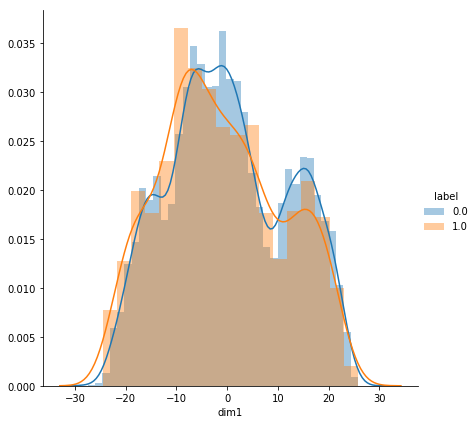

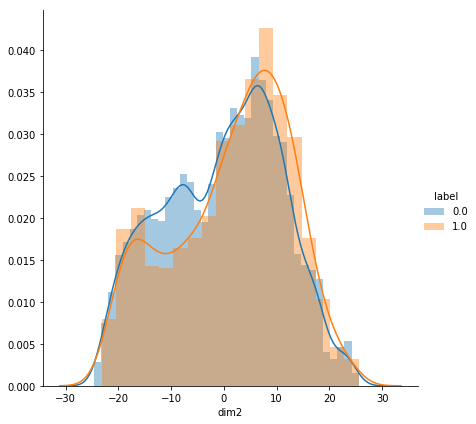

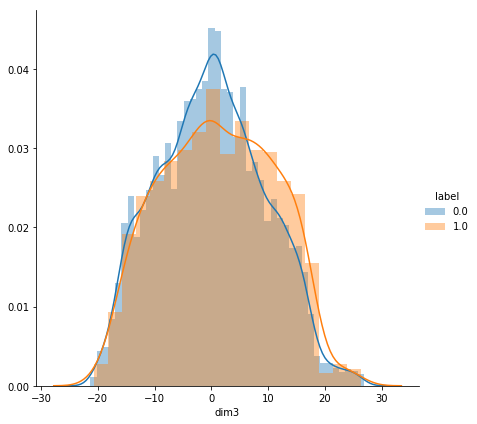

In [104]:
ax = sns.FacetGrid(dfa,hue="label",height=6).map(sns.distplot,'dim1').add_legend()
ax1 = sns.FacetGrid(dfa,hue="label",height=6).map(sns.distplot,'dim2').add_legend()
ax3 = sns.FacetGrid(dfa,hue="label",height=6).map(sns.distplot,'dim3').add_legend()

## Modelling

In [109]:
model.get_params()

(20442, 2394)


{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'random',
 'learning_rate': 200.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 3,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'perplexity': 30.0,
 'random_state': 0,
 'verbose': 1}

### Test data prep

In [123]:
test_id = test_df.iloc[:,0]
test_id[:5]

0    RIGD58ZWD
1    RIH660YDS
2    RIH660Q96
3    RIYDO15W1
4    RIYBGC1ZD
Name: Col1, dtype: object

In [124]:
test_X = test_df.iloc[:,1:]
type(test_X)

pandas.core.frame.DataFrame

In [125]:
test_X.describe()

,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col37,Col38,Col39,Col40,Col41,Col42,...,Col2358,Col2359,Col2360,Col2361,Col2362,Col2363,Col2364,Col2365,Col2366,Col2367,Col2368,Col2369,Col2370,Col2371,Col2372,Col2373,Col2374,Col2375,Col2376,Col2377,Col2378,Col2379,Col2380,Col2381,Col2382,Col2383,Col2384,Col2385,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
count,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,19102.000000,19096.000000,19095.000000,19108.000000,18873.000000,17693.000000,2945.000000,3511.000000,19108.000000,19096.000000,19108.000000,19095.000000,20442.000000,20442.000000,20075.000000,7341.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,1832.000000,755.000000,2992.000000,381.000000,1948.000000,1.883400e+04,...,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,20442.000000,19183.000000,19183.000000,19164.000000,19183.000000,19183.000000,19164.000000
mean,3.749822e+04,2.360107e+04,3.099296e+04,3.153122e+04,2.728287e+04,3.625497e+04,3.282116e+04,3.295643e+04,3.903867e+04,3.901378e+04,9.395002,9.136331,9.381553,9.324226,1.058392,2.938466,34.210326,8.685433,1.017168,1.154246,0.745563,0.871645,0.193806,0.145136,0.282508,0.174794,1.443939,1.406907,1.479943,1.597055,1.406320,0.998092,0.067410,5.164514,6.817686,3.352318,4.105281,6.501312,3.647331,1.671335e+03,...,0.300558,0.202818,0.728402,0.482389,0.265679,0.180462,0.112905,0.095441,0.261912,0.205117,1.026612,0.834018,1.069073,0.913120,0.022014,0.030183,0.035026,0.024557,1.059681,0.847960,1.033607,0.834899,0.283436,0.222092,0.037325,0.024215,0.205851,0.164955,0.062567,0.046913,0.634674,0.558262,0.670238,0.589864,49.688474,49.131366,31.288614,17.008341,16.527238,9.726936
std,8.090349e+05,6.659282e+05,6.434903e+05,6.422364e+05,6.588844e+05,6.710696e+05,3.642904e+05,3.831866e+05,4.169885e+05,4.400329e+05,1.720178,1.947375,1.964154,1.625364,0.167346,8.860999,126.587502,40.250953,1.403277,0.645695,1.041561,0.526873,0.301741,0.300553,0.559084,0.773851,0.687880,0.691748,0.771422,1.463513,0.853288,0.156856,0.254994,0.814889,10.377661,5.582310,1.750754,18.400604,11.778357,1.211338e+05,...,0.697314,0.530795,0.895883,0.707925,0.670151,0.509163,0.370201,0.328125,0.620481,0.512595,0.972382,0.864699,0.973261,0.881061,0.158896,0.179468,0.236666,0.185539,0.969603,0.858386,0.972442,0.863339,0.643854,0.533121,0.244755,0.186766,0.559453,0.466990,0.271160,0.227721,0.853880,0.784091,0.867530,0.796850,62.765442,61.032971,38.698616,29.464562,29.155274,17.616897
min,-6.766640e+07,-6.416449e+07,-2.951962e+07,-5.160258e+07,-6.282747e+07,-5.448213e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.336483,-1.791757,-1.529394,-1.416754,0.003132,-85.745494,-2007.804810,-1102.110337,0.000705,0.000000,0.003484,0.000000,-1.220456,-1.220448,-1.414214,-1.414214,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.511620e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.037609e+03,2.255115e+03,2.081114e+03

In [120]:
print(test_df.shape)

test_X = model.fit_transform(test_df.iloc[:,1:])
model.get_params()

(20442, 2394)


ValueError: ignored

In [0]:
# logistic baseline classification model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)


## Evaluation

In [0]:
# Evaluate F1-score

## Can try

In [0]:
# Replacing numeric values with median and cat with mode
# Shuffle and fill values for second time
# Deciding the number of components for tsne
# Feature selection if ML
# grid search
# Random search
# neural network
# XGBoost 
# lightgbm
# 0   and 0.0 were different